# Table of Contents
## Step 1. Importing libraries and data
## Step 3. Provide descriptive findings about sales
## Step 4. Identify distribution of orders in term of loyalty
## Step 5. Explore difference in expenditure depending on the hour of the day
## Step 6. Explore connection between age and family situation
## Step 7. Explore connection between age and spending power

# Step 1. Importing libraries and data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create shortcut to import files from project folder

path = r'C:\Users\radav\OneDrive\Documents\Career Foundry\Data Analytics\Immersion\Achievement 4 Python Fundamentals\Instacart Basket Analysis'

In [3]:
# Import merged file

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

# Step 3. Provide descriptive findings about sales

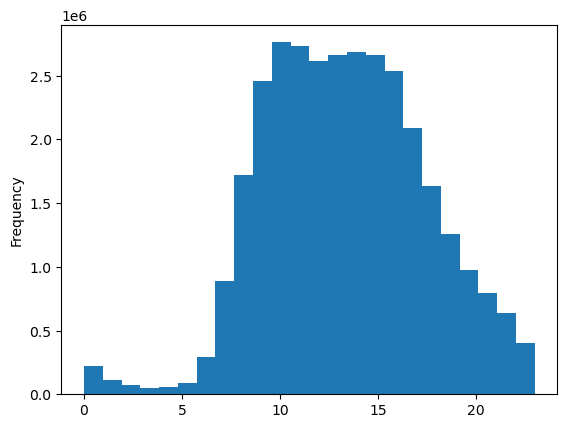

In [4]:
# Create histogram of 'orders_hour_of_day' column and save as object

hist = df['order_hour_of_day'].plot.hist(bins = 24)

#### The histogram shows that orders have a normal distribution with a slight left skew in terms of time of day. The busiest hours of the day are from 9am to 5pm. Before 9am orders generally increase in the immediate preceding hours, whereas after 5pm they steadily decrease each hour until the end of the day. The quietest time of day for orders is in the early morning hours around 1-5am. This histogram is helpful in identifying the level of company resources necessary at different times of day to fulfil the order requests. 

In [5]:
# Export histogram

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

# Step 4. Identify distribution of orders in term of loyalty

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

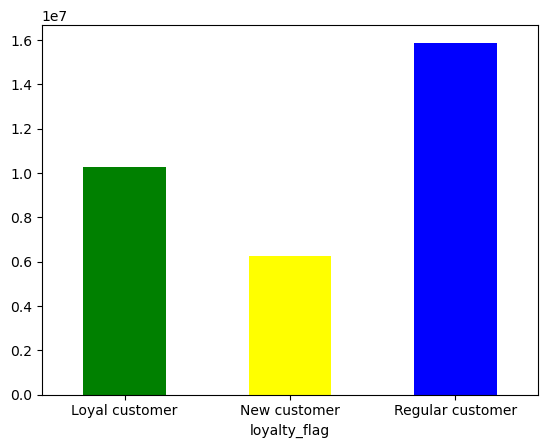

In [6]:
# Create a bar chart using 'loyalty_flag' and save as object

bar = df['loyalty_flag'].value_counts().sort_index().plot.bar(color = ['green', 'yellow', 'blue'])
plt.xticks(rotation=360)

#### Regular customers represent about half of total orders, loyal customers about a third, and the rest are from new customers. 

In [7]:
# Export bar chart

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_loyalty_flag.png'))

# Step 5. Explore difference in expenditure depending on the hour of the day

In [8]:
# Create a list of randomized values to prepare to split the dataframe for sampling

np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [9]:
# Create a big dataframe with a sample of 70% of the main dataframe and a small dataframe with 30%

big = df[dev]
small = df[~dev]

In [10]:
# Check output

len(df)

32404859

In [11]:
len(big) + len(small)

32404859

In [12]:
# Reduce sample to only columns needed from small sample

df_2 = small[['order_hour_of_day','prices']]

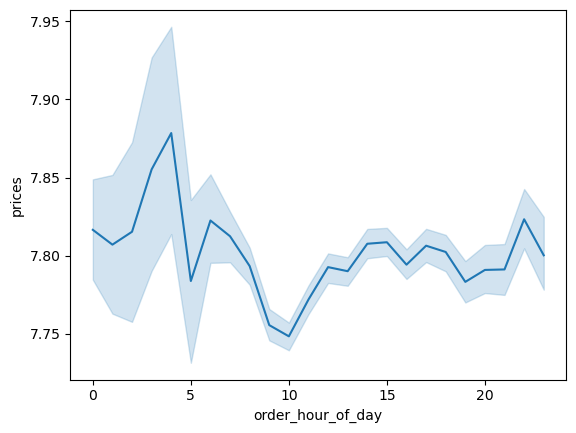

In [13]:
# Create line chart of prices across hours of day

line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

#### There is not much difference in expenditure depending on the time of day. There is marginally higher expenditure in very early morning orders with slightly lower expenditure in orders around 9-10am, but the variation is small.

In [14]:
# Export line chart

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_hour_of_day.png'))

# Step 6. Explore connection between age and family situation

In [15]:
# Reduce sample to only columns needed from small sample to identify connection between age and number of family dependents

df_3 = small[['age','number_of_dependents']]

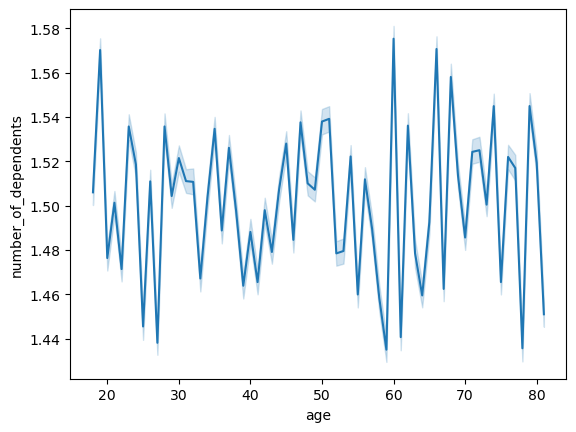

In [16]:
# Create line chart of family dependents across age

line_2 = sns.lineplot(data = df_3, x = 'age',y = 'number_of_dependents')

#### The line chart shows that the average number of dependents does not vary too much with age, remaining within a range of 1.44 to 1.58 on average. The number tends to be on average a little lower at younger and older ages, with slightly higher averages for people aged 30 to early 50's, which is as expected as these are the prime income-earning years when a person is likely to have more family dependents. 

In [17]:
# Export line chart

line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_dependents_age.png'))

# Step 7. Explore connection between age and spending power

In [18]:
# Create sample with only columns needed from small sample to identify connection between age and income

df_4 = small[['age','income']]

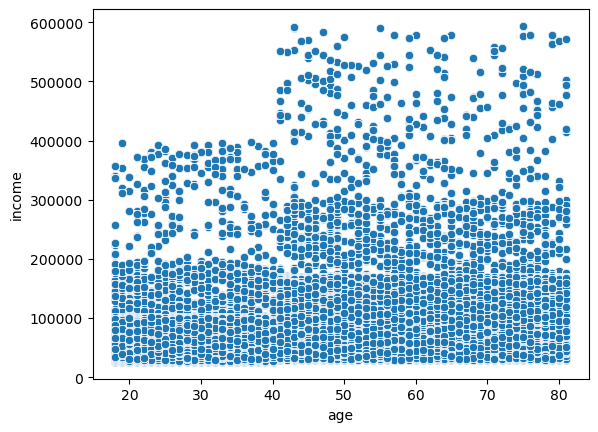

In [19]:
# Create scatterplot of age and income and save as object

scatterplot = sns.scatterplot(x = 'age', y = 'income',data = df_4)

#### The scatterplot shows that the vast majority of customers have income under 200k dollars. It also shows that the highest income levels are among older people, with nobody under 40 with income above 400k dollars. There are many customers between 40 and 80 with income above 400k dollars. However, within that older age group there doesn't seem to be much of a relationship between age and income. The income observations are very similar from ages 40 to 80. There are perhaps slightly more higher income observations in the 40-50 age range than at higher age levels. This 40-50 age group appears to be the peak income age group, which may be helpful for targeted marketing campaigns.

In [20]:
# Export scatterplot

scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_income_age.png'))